# WELCOME TO ATTEMPT **3** of **"*THE MOST AUTISTIC THING I HAVE DONE, LIKE, EVER*"**

This is mostly attempt 2 again, **note to self, backups are not optional**.
The whole attempt 2/3 is due to v1's failings, but a bit of a recap first.

## Recap
This whole endevour is to check definitely how much time has passed in the webserial *"Wearing Power Armor to a Magic School"* written by **JCB112** (or `WPatMS` for short), the other goal is to predict in which chapter a *"communication deadline"* which happens 5 weeks after the beginning of the book.

Thanks to a **TON** of manual analysis we know that the book can't start any earier than 15:30 on the first day

## V1 Sucesses
As much as V1 was flawed from the start it did a bit of good:
1. **THE GRAPHS**, v1 gave us some very good graphs, even though they were a bit wonky in places *(the X-axis)*
2. It helped greately with the manual analysis
3. It proved that this way of parsing the timestamps can work

## V1 Problems
This is a bit easier than the above section:
1. The creation of html files and only then parsing them is a stupid idea. It would have some merit, if any changes would be made for these files, but such a thing was just not done
2. The jupyter notebook changed some variables in a cell, which did not have the definition, this made the code require a full restart on every run, as running it twice changed some variables
3. The code was not portable, the creation of the html files and the folders, required the use of some linux only commands, i want to change that by ... just not having any files saved
4. **THE GRAPHS™** all have a wonky x-axes, this is due to x being "event index" and not "chapter". This was easier, but it makes everything harder to understand

## V2 Failings
Ok this will be short. ***BACKUPS***.

So I opened a vscode server, connect to it from school (this is after *4 fucking days of coding*) **AND IT FUCKING DELETES THE WHOLE FUCKING FILE**

As to the fix, this is a git repo.

The second main failing was keeping the use of timestamps, and not just "minutes after midnight".

## V3 - Functional description

1. Parse the epub (it will be XHTML), as a list called `book` containing `chapters` that are a list of lines
2. Search for timestamps
3. Convert the timestamps to "minutes after midnight
4. Do some graphs
5. Find the amount of days that passed
6. Find the chapter, where the deadline passes

# Install of the required libraries
This code uses 2 libraries, namely [EbookLib](https://pypi.org/project/EbookLib/) and [matPlotLib](https://matplotlib.org/)

In [5]:
%%capture
# the %%capture thing makes the output supressed, on first run you might want to comment that out

# install the used libraries, thank god for FOSS
%pip install EbookLib
%pip install matplotlib

## Epub extraction
This cell extracts the `WPAtaMS.epub` file.

The code is a modified version of the example from [here](http://docs.sourcefabric.org/projects/ebooklib/en/latest/tutorial.html#reading-epub).

But `chapter.get_body_content()` gives a bytestring, so we change that to a utf-8 encoded string, and then split to lines

In [18]:
import ebooklib
from ebooklib import epub

bookFile = epub.read_epub("./WPAtaMS.epub")

book = []

for chapter in bookFile.get_items_of_type(ebooklib.ITEM_DOCUMENT):
    byteChapter = chapter.get_body_content()
    strChapter = str(byteChapter,'UTF-8')
    book.append(strChapter.split('\n'))

#chapter 0 and the last one are the ToC and the cover image respecly, let's detete them
book.pop(0)
book.pop(-1)

# The book starts at 1530 but that chapter does not have a timestamp, so we are going to add it
book[0].append("This is manually added TIME: 1530")



book[0][:5]

/home/rim/Desktop/WPAtaMS-Analyzer/.venv/lib/python3.10/site-packages/ebooklib/epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')
/home/rim/Desktop/WPAtaMS-Analyzer/.venv/lib/python3.10/site-packages/ebooklib/epub.py:1423: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to './/xmlns:rootfile[@media-type]'
  for root_file in tree.findall('//xmlns:rootfile[@media-type]', namespaces={'xmlns': NAMESPACES['CONTAINERNS']}):


['',
 '  <h1>Chapter 1: Second Contact</h1>',
 '  <div class="chapter-inner chapter-content">',
 '                <p class=""><span style="font-weight: 400">There was a lot of fanfare that surrounded the first human to have made it to the Academy. Though it wasn’t because they were particularly well liked, or studious. Nor was it because they were in some way infamous or unsavory. In fact, they simply hadn’t had enough time to make an impact either way, as they’d emerged through the portal dead on arrival.</span></p>',
 '<p class=""><span style="font-weight: 400">It was a known fact that humans were just inherently magically-deficient. Their race was the last of the adjacent realms to have even detected the </span><em><span style="font-weight: 400">existence</span></em><span style="font-weight: 400"> of magic after all, let alone learning of the Nexus’ existence. What wasn’t expected however was just how truly deficient they actually </span><em><span style="font-weight: 400">were</span

## Parsing
To parse we first need to search for the timestamp, it is always given in either `hhmm` or `hh:mm` format. But always (excluding one time), the timestamp is preceeded at some point by the word `time`, in the same line, we will search for both.

The timestamp seach will be done using a regex, namely this one
```regex
   /([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]/
```

In [19]:
import re

def toMinutes(timestamp)->int:
    hours = int(timestamp[:2])
    minutes = int(timestamp[2:])
    return (60*hours)+minutes


timestamps = [] # this is an array of timestamps in the "minutes after midnight" format

for chapter in book:
    chTimestamps = []
    for line in chapter:
        if re.search(r'([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]',line) is not None:
            if line.upper().find("TIME:") != -1 or line.upper().find("HOURS") != -1:
                timestamp = re.search(r'([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]',line)
                timestamp = timestamp.group().replace(':','')
                chTimestamps.append(toMinutes(timestamp))
    timestamps.append(chTimestamps)

timestamps[:5]

[[930], [], [], [], []]

## Plotting
We are back at the plots, *yay, it is not that i lost a week of work to  get back here* ... But now we use `minutesAfterMidnight` directly

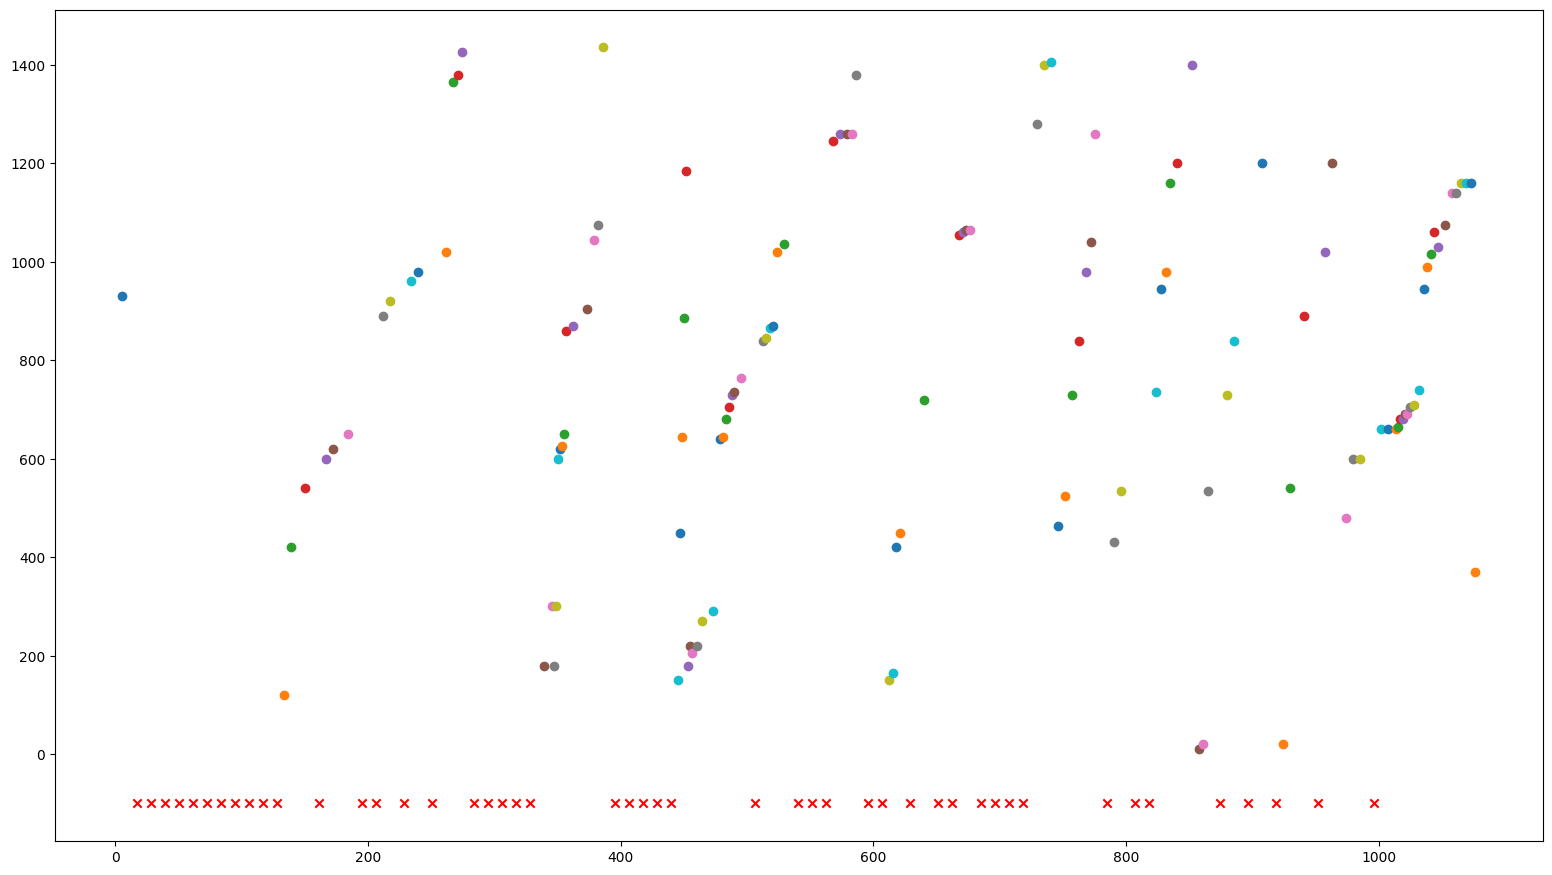

In [20]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(19.2,10.8))

fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi

unit = size[1].item()/len(timestamps)
halfUnit = unit/2

for chapterNumber,chapter in enumerate(timestamps):

    xStart = unit*chapterNumber
    xEnd = xStart+unit

    if len(chapter) == 0:
        # print(chapterNumber)
        plt.scatter(xStart+halfUnit,-100,c='red',marker='x')
    elif len(chapter) == 1:
        plt.scatter(xStart+halfUnit,chapter[0])
    else:
        interUnit = unit/len(chapter)
        for timestampNumer,timestamp in enumerate(chapter):
            plt.scatter(xStart+(interUnit*timestampNumer),timestamp)
            

        

plt.show()